In [1]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
import io
import pandas as pd
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D ,Dense , Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [4]:
X = train_data.drop(['label'], 1).values
y = train_data['label'].values

In [5]:
test_x = test_data.values

In [6]:
X = X / 255.0
test_x = test_x / 255.0

In [7]:
X = X.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [8]:
y = to_categorical(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [16]:
model=Sequential()  
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        horizontal_flip=False, 
        vertical_flip=False)  

train_gen = datagen.flow(X_train, y_train, batch_size=64)
test_gen = datagen.flow(X_test, y_test, batch_size=64)

In [12]:
history = model.fit_generator(train_gen, 
                              epochs = 50, 
                              steps_per_epoch = X_train.shape[0] // 64,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // 64)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
590/590 [==============================] - 20s 21ms/step - loss: 0.2990 - accuracy: 0.9064 - val_loss: 0.0770 - val_accuracy: 0.9757
Epoch 2/50
590/590 [==============================] - 12s 20ms/step - loss: 0.0741 - accuracy: 0.9769 - val_loss: 0.0852 - val_accuracy: 0.9726
Epoch 3/50
590/590 [==============================] - 12s 20ms/step - loss: 0.0633 - accuracy: 0.9799 - val_loss: 0.0542 - val_accuracy: 0.9861
Epoch 4/50
590/590 [==============================] - 12s 20ms/step - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.0645 - val_accuracy: 0.9810
Epoch 5/50
590/590 [==============================] - 12s 20ms/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.0406 - val_accuracy: 0.9873
Epoch 6/50
590/590 [==============================] - 12s 20ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0427 - val_accuracy: 0.9856
Epoch 7/50
590/590 [==============================] - 12s 20ms/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0461 - val_accuracy:

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [14]:
print(f"Accuracy on training data is:- {acc[-1]*100} %")
print(f"Loss {loss[-1]*100}")

print(f"Accuracy on validation data is:- {val_acc[-1]*100} %")
print(f"Loss {val_loss[-1]*100}")

Accuracy on training data is:- 99.70585107803345 %
Loss 0.8826431818306446
Accuracy on validation data is:- 99.25480484962463 %
Loss 1.8920322880148888


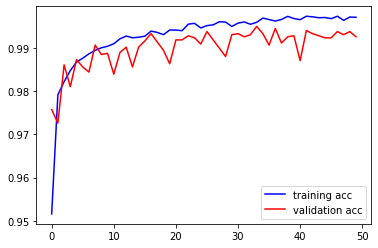

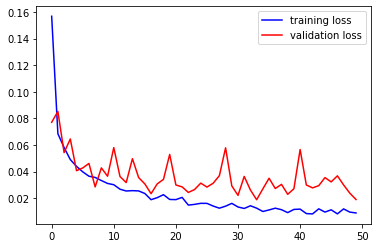

In [15]:
epochs = range(len(acc))

plt.plot(epochs, acc,'b',label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.legend()
plt.show()


plt.plot(epochs, loss,'b',label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend()
plt.show()